In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/")

In [3]:
os.chdir("/content/drive/My Drive/dataset/")
!ls

adaniport.csv	 data.pth				rapidsai-csp-utils     titanic.csv
article		 decision_tree_graphivz.png.png		Real.csv	       train.csv
cashflow.csv	 diabetes.csv				sample_sales_data.csv  twittersentiment.csv
credit_card.csv  Grocery.csv				solar.csv	       weather1.csv
crop.csv	 Loan.pickle				stock.pkl	       winequality.csv
crops.pkl	 Mumbai1.csv				submission.csv
cufile.log	 mumbai_house_prices_prediction.pickle	t1.csv
cyber.csv	 my_model.h5				test.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('cashflow.csv')
df.head()

,Department,Date,Code,Expense Type,P.O. No.,Vendor Name,Invoice No.,Invoice Date,From Date,To Date,...,Invoice raised by Accounts,Checker Approval,Approvers Approval,Moved to Accounts bucket to Payment Made,Direct Invoice Raised,Approved by Checker.1,Approved by Approver,Moved to Accounts bucket for Payment,Payment Date.1,Payment Terms\n(Days)
0,Infra,Apr-23,ITIBAI,Opex,DI-1,ABC Technologies,ABCPrimaryAMJ23,01-Apr-23,01-Apr-23,30-Jun-23,...,NaN,NaN,NaN,NaN,3-Apr-23,3-Apr-23,3-Apr-23,3-Apr-23,28-Apr-23,45
1,Infra,Apr-23,ITIBBB,Opex,DI-2,ABC Technologies,ABCSecondaryAMJ23,01-Apr-23,01-Apr-23,30-Jun-23,...,NaN,NaN,NaN,NaN,3-Apr-23,3-Apr-23,3-Apr-23,3-Apr-23,28-Apr-23,45
2,Infra,Apr-23,ITIILL,Opex,DI-3,ABC Technologies,MH-23-24-0017,01-Apr-23,01-Apr-23,30-Jun-23,...,NaN,NaN,NaN,NaN,3-Apr-23,3-Apr-23,3-Apr-23,3-Apr-23,25-Apr-23,45
3,Infra,Apr-23,ITIILL,Opex,DI-4,ABC Technologies,MH-23-24-0091,01-Apr-23,01-Apr-23,30-Jun-23,...,NaN,NaN,NaN,NaN,3-Apr-23,3-Apr-23,3-Apr-23,3-Apr-23,25-Apr-23,45
4,Infra,Feb-23,ITIBAI,Opex,DI-5,ABC Technologies,MH-23-24-0100,01-Apr-23,18-Feb-23,30-Jun-23,...,NaN,NaN,NaN,NaN,3-Apr-23,3-Apr-23,3-Apr-23,3-Apr-23,9-May-23,45


Data preprocessing

In [6]:
df.shape

(1073, 34)

In [7]:
df.isnull().sum()

Department                                    0
Date                                          0
Code                                          0
Expense Type                                  0
P.O. No.                                      0
Vendor Name                                   0
Invoice No.                                   0
Invoice Date                                  0
From Date                                     9
To Date                                       9
Base Amount                                   0
CGST/ SGST                                    1
IGST/ UGST                                    0
Total Amount                                  0
TDS                                          17
Other Charges Deducted                       15
Hand over to F&A                              6
Payment Date                                 59
Additional Remarks                            0
FY24 Impact                                   0
Invoice Category                        

In [8]:
df1 = df[['Date','Expense Type','Vendor Name','Department','P.O. No.','FY24 Impact','Invoice Category','Invoice Date','From Date','To Date','Payment Terms\n(Days)','Payment Date','Approvers Approval','Total Amount']]
df1.head()

,Date,Expense Type,Vendor Name,Department,P.O. No.,FY24 Impact,Invoice Category,Invoice Date,From Date,To Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount
0,Apr-23,Opex,ABC Technologies,Infra,DI-1,"2,12,800",PO Based,01-Apr-23,01-Apr-23,30-Jun-23,45,28-Apr-23,NaN,"2,51,104"
1,Apr-23,Opex,ABC Technologies,Infra,DI-2,"9,61,326",PO Based,01-Apr-23,01-Apr-23,30-Jun-23,45,28-Apr-23,NaN,"11,34,365"
2,Apr-23,Opex,ABC Technologies,Infra,DI-3,"1,27,500",PO Based,01-Apr-23,01-Apr-23,30-Jun-23,45,25-Apr-23,NaN,"1,50,450"
3,Apr-23,Opex,ABC Technologies,Infra,DI-4,"1,29,999",PO Based,01-Apr-23,01-Apr-23,30-Jun-23,45,25-Apr-23,NaN,"1,53,399"
4,Feb-23,Opex,ABC Technologies,Infra,DI-5,"1,38,122",PO Based,01-Apr-23,18-Feb-23,30-Jun-23,45,9-May-23,NaN,"1,62,984"


In [9]:
df1.shape

(1073, 14)

In [10]:
df1.isnull().sum()

Date                       0
Expense Type               0
Vendor Name                0
Department                 0
P.O. No.                   0
FY24 Impact                0
Invoice Category           0
Invoice Date               0
From Date                  9
To Date                    9
Payment Terms\n(Days)      0
Payment Date              59
Approvers Approval       325
Total Amount               0
dtype: int64

In [11]:
df1 = df1.dropna()

In [12]:
df1.isnull().sum()

Date                     0
Expense Type             0
Vendor Name              0
Department               0
P.O. No.                 0
FY24 Impact              0
Invoice Category         0
Invoice Date             0
From Date                0
To Date                  0
Payment Terms\n(Days)    0
Payment Date             0
Approvers Approval       0
Total Amount             0
dtype: int64

In [13]:
df1.shape

(717, 14)

In [14]:
df1.dtypes

Date                     object
Expense Type             object
Vendor Name              object
Department               object
P.O. No.                 object
FY24 Impact              object
Invoice Category         object
Invoice Date             object
From Date                object
To Date                  object
Payment Terms\n(Days)     int64
Payment Date             object
Approvers Approval       object
Total Amount             object
dtype: object

In [15]:
df1['Total Amount'] = df1['Total Amount'].str.replace(',', '')

In [16]:
df1['Total Amount'] = df1['Total Amount'].str.replace('-', '')

In [17]:
df1['Total Amount'] = pd.to_numeric(df1['Total Amount'])

In [18]:
df1['FY24 Impact'] = df1['FY24 Impact'].str.replace(',', '')
df1['FY24 Impact'] = df1['FY24 Impact'].str.replace('-', '')
df1['FY24 Impact'] = pd.to_numeric(df1['FY24 Impact'])

In [19]:
df1['Cashflow'] = df1['Total Amount'] - df1['FY24 Impact']

# Merge cashflow column with df1
df1 = df1.merge(df1[['Cashflow']], how='left', on=None)
df1.head()

,Date,Expense Type,Vendor Name,Department,P.O. No.,FY24 Impact,Invoice Category,Invoice Date,From Date,To Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount,Cashflow
0,Apr-23,Opex,ABC Digital4com,Infra,XYZCL|XYZ|2023-24|1032,182500.0,PO Based,07-Apr-23,07-Apr-23,07-Apr-23,45,18-May-23,16-May-23,215350.0,32850.0
1,Apr-23,Opex,ABC Solutions,Infra,XYZCL|XYZ|2023-24|1038,4650.0,PO Based,10-Apr-23,10-Apr-23,10-Apr-23,45,29-Apr-23,21-Apr-23,5487.0,837.0
2,Dec-22,Opex,ABC GmbH,Infra,XYZCL|XYZ|2023-24|1058,378600.0,PO Based,11-Apr-23,12-Dec-22,11-Dec-23,45,-,17-Apr-23,446748.0,68148.0
3,Apr-23,Opex,ABC Computer,Infra,XYZCL|XYZ|2023-24|1076,4600.0,PO Based,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,5428.0,828.0
4,Apr-23,Opex,ABC Solutions,Infra,XYZCL|XYZ|2023-24|1077,29550.0,PO Based,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,34869.0,5319.0


In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Expense Type']= label_encoder.fit_transform(df1['Expense Type'])
df1['Expense Type'].unique()

array([1, 0])

In [21]:
df1['Vendor Name']= label_encoder.fit_transform(df1['Vendor Name'])
df1['Vendor Name'].unique()

array([ 4, 23,  6,  3, 44, 14,  0, 47, 33, 24, 37, 10, 28, 36,  8,  7, 18,
       31, 19, 39, 50,  1, 13, 49, 34, 43, 27, 35, 16, 48, 26, 22,  9, 45,
       25, 17, 32,  5, 15, 11, 21, 38, 12, 46, 20, 51, 42, 29, 40, 30,  2,
       41, 62, 73, 65, 67, 56, 72, 61, 63, 57, 69, 55, 66, 75, 70, 54, 52,
       59, 68, 60, 64, 74, 71, 53, 58])

In [22]:
df1['Department']= label_encoder.fit_transform(df1['Department'])
df1['Department'].unique()

array([1, 0])

In [23]:
df1['Invoice Category']= label_encoder.fit_transform(df1['Invoice Category'])
df1['Invoice Category'].unique()

array([0, 1])

In [24]:
df1.head()

,Date,Expense Type,Vendor Name,Department,P.O. No.,FY24 Impact,Invoice Category,Invoice Date,From Date,To Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount,Cashflow
0,Apr-23,1,4,1,XYZCL|XYZ|2023-24|1032,182500.0,0,07-Apr-23,07-Apr-23,07-Apr-23,45,18-May-23,16-May-23,215350.0,32850.0
1,Apr-23,1,23,1,XYZCL|XYZ|2023-24|1038,4650.0,0,10-Apr-23,10-Apr-23,10-Apr-23,45,29-Apr-23,21-Apr-23,5487.0,837.0
2,Dec-22,1,6,1,XYZCL|XYZ|2023-24|1058,378600.0,0,11-Apr-23,12-Dec-22,11-Dec-23,45,-,17-Apr-23,446748.0,68148.0
3,Apr-23,1,3,1,XYZCL|XYZ|2023-24|1076,4600.0,0,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,5428.0,828.0
4,Apr-23,1,23,1,XYZCL|XYZ|2023-24|1077,29550.0,0,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,34869.0,5319.0


In [25]:
df1['Payment Terms\n(Days)'].unique()

array([45, 30])

In [26]:
corr_matrix = df1.corr()

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt

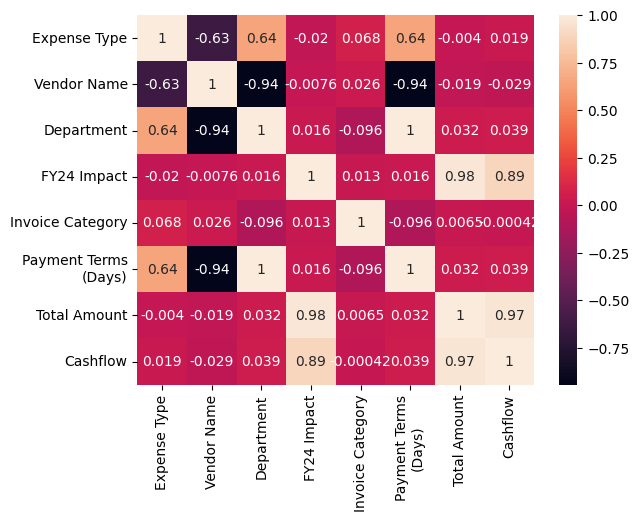

In [28]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [29]:
df1.head()

,Date,Expense Type,Vendor Name,Department,P.O. No.,FY24 Impact,Invoice Category,Invoice Date,From Date,To Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount,Cashflow
0,Apr-23,1,4,1,XYZCL|XYZ|2023-24|1032,182500.0,0,07-Apr-23,07-Apr-23,07-Apr-23,45,18-May-23,16-May-23,215350.0,32850.0
1,Apr-23,1,23,1,XYZCL|XYZ|2023-24|1038,4650.0,0,10-Apr-23,10-Apr-23,10-Apr-23,45,29-Apr-23,21-Apr-23,5487.0,837.0
2,Dec-22,1,6,1,XYZCL|XYZ|2023-24|1058,378600.0,0,11-Apr-23,12-Dec-22,11-Dec-23,45,-,17-Apr-23,446748.0,68148.0
3,Apr-23,1,3,1,XYZCL|XYZ|2023-24|1076,4600.0,0,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,5428.0,828.0
4,Apr-23,1,23,1,XYZCL|XYZ|2023-24|1077,29550.0,0,12-Apr-23,12-Apr-23,12-Apr-23,45,27-Apr-23,21-Apr-23,34869.0,5319.0


In [30]:
df1['Payment Date'].replace('-', np.nan, inplace=True)

In [31]:
df1.isnull().sum()

Date                       0
Expense Type               0
Vendor Name                0
Department                 0
P.O. No.                   0
FY24 Impact               25
Invoice Category           0
Invoice Date               0
From Date                  0
To Date                    0
Payment Terms\n(Days)      0
Payment Date             129
Approvers Approval         0
Total Amount               5
Cashflow                  25
dtype: int64

In [32]:
df1 = df1.dropna()

In [33]:
df1.isnull().sum()

Date                     0
Expense Type             0
Vendor Name              0
Department               0
P.O. No.                 0
FY24 Impact              0
Invoice Category         0
Invoice Date             0
From Date                0
To Date                  0
Payment Terms\n(Days)    0
Payment Date             0
Approvers Approval       0
Total Amount             0
Cashflow                 0
dtype: int64

In [34]:
df1['Payment Date'] = pd.to_datetime(df1['Payment Date'], format='%d-%b-%y')
df1['Approvers Approval'] = pd.to_datetime(df1['Approvers Approval'], format='%d-%b-%y')
df1['From Date'] = pd.to_datetime(df1['From Date'], format='%d-%b-%y')
df1['Invoice Date'] = pd.to_datetime(df1['Invoice Date'], format='%d-%b-%y')
df1['Date'] = pd.to_datetime(df1['Date'], format='%b-%y')

In [41]:
df1['Date'] = df1['Date'].apply(lambda x: x.timestamp()).astype(float)
df1['Payment Date'] = df1['Payment Date'].apply(lambda x: x.timestamp()).astype(float)
df1['Approvers Approval'] = df1['Approvers Approval'].apply(lambda x: x.timestamp()).astype(float)
df1['From Date'] = df1['From Date'].apply(lambda x: x.timestamp()).astype(float)
df1['Invoice Date'] = df1['Invoice Date'].apply(lambda x: x.timestamp()).astype(float)

In [42]:
df1.dtypes

Date                     float64
Expense Type               int64
Vendor Name                int64
Department                 int64
P.O. No.                  object
FY24 Impact              float64
Invoice Category           int64
Invoice Date             float64
From Date                float64
To Date                   object
Payment Terms\n(Days)      int64
Payment Date             float64
Approvers Approval       float64
Total Amount             float64
Cashflow                 float64
dtype: object

In [43]:
df1.head()

,Date,Expense Type,Vendor Name,Department,P.O. No.,FY24 Impact,Invoice Category,Invoice Date,From Date,To Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount,Cashflow
0,1.680307e+09,1,4,1,XYZCL|XYZ|2023-24|1032,182500.0,0,1.680826e+09,1.680826e+09,07-Apr-23,45,1.684368e+09,1.684195e+09,215350.0,32850.0
1,1.680307e+09,1,23,1,XYZCL|XYZ|2023-24|1038,4650.0,0,1.681085e+09,1.681085e+09,10-Apr-23,45,1.682726e+09,1.682035e+09,5487.0,837.0
3,1.680307e+09,1,3,1,XYZCL|XYZ|2023-24|1076,4600.0,0,1.681258e+09,1.681258e+09,12-Apr-23,45,1.682554e+09,1.682035e+09,5428.0,828.0
4,1.680307e+09,1,23,1,XYZCL|XYZ|2023-24|1077,29550.0,0,1.681258e+09,1.681258e+09,12-Apr-23,45,1.682554e+09,1.682035e+09,34869.0,5319.0
5,1.680307e+09,1,44,1,XYZCL|XYZ|2023-24|1002,53768.0,0,1.681085e+09,1.680566e+09,05-Apr-24,45,1.682554e+09,1.682035e+09,63446.0,9678.0


Feature extraction

In [44]:
 # random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [45]:
X = df1.drop(columns=['Cashflow','P.O. No.','To Date'],axis=1)

In [46]:
y = df1['Cashflow']

In [47]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [49]:
X.head()

,Date,Expense Type,Vendor Name,Department,FY24 Impact,Invoice Category,Invoice Date,From Date,Payment Terms\n(Days),Payment Date,Approvers Approval,Total Amount
0,1.680307e+09,1,4,1,182500.0,0,1.680826e+09,1.680826e+09,45,1.684368e+09,1.684195e+09,215350.0
1,1.680307e+09,1,23,1,4650.0,0,1.681085e+09,1.681085e+09,45,1.682726e+09,1.682035e+09,5487.0
3,1.680307e+09,1,3,1,4600.0,0,1.681258e+09,1.681258e+09,45,1.682554e+09,1.682035e+09,5428.0
4,1.680307e+09,1,23,1,29550.0,0,1.681258e+09,1.681258e+09,45,1.682554e+09,1.682035e+09,34869.0
5,1.680307e+09,1,44,1,53768.0,0,1.681085e+09,1.680566e+09,45,1.682554e+09,1.682035e+09,63446.0


Feature: 0, Score: 0.00079
Feature: 1, Score: 0.00030
Feature: 2, Score: 0.00165
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.51436
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00306
Feature: 7, Score: 0.00073
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00140
Feature: 10, Score: 0.00094
Feature: 11, Score: 0.47673


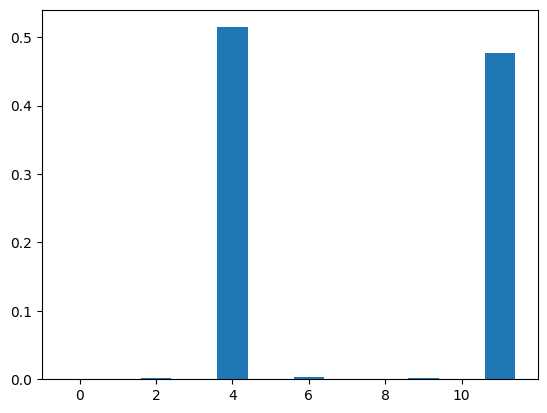

In [48]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -1.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 1.00000


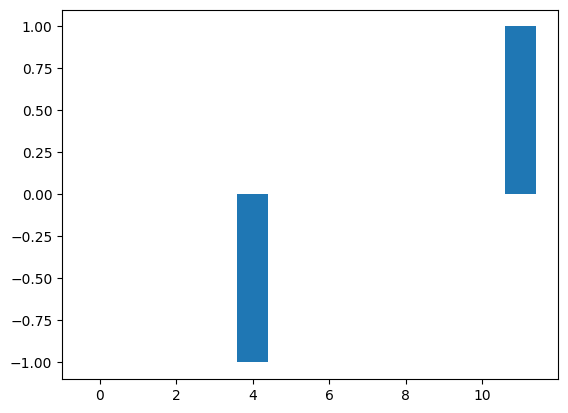

In [56]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.01655
Feature: 3, Score: 0.00000
Feature: 4, Score: -1.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 1.00000


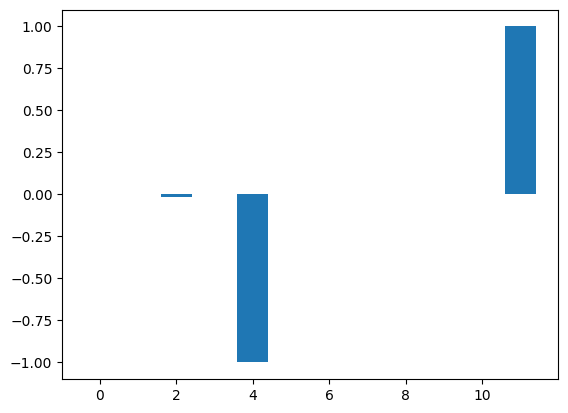

In [61]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X, y)

importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000


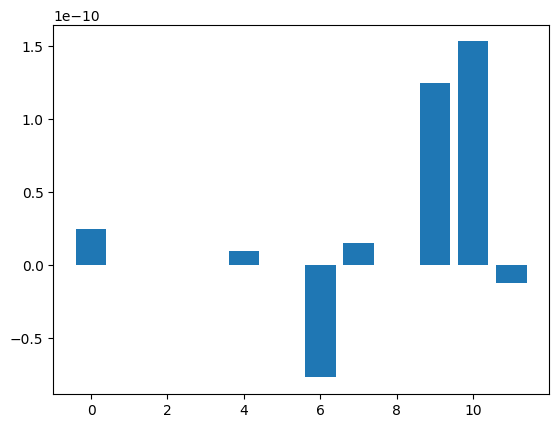

In [62]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.02036
Feature: 1, Score: 0.00821
Feature: 2, Score: 0.02723
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.84770
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02002
Feature: 7, Score: 0.00031
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00183
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.07432


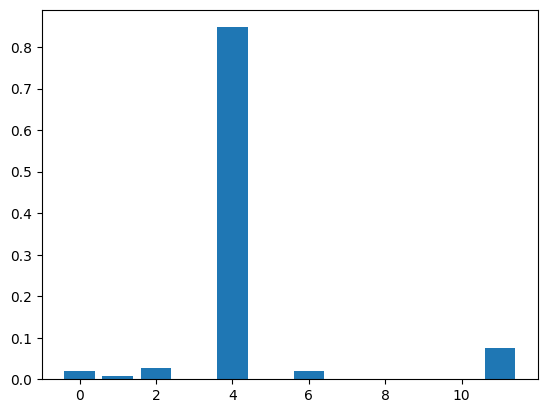

In [63]:
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Split train and test

In [50]:
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Regression

Random Forest

In [51]:
model1 = RandomForestRegressor()
model1.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
score = model1.score(X_test, Y_test)
score

In [71]:
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyperparam tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [77]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [79]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 890.0258 degrees.
Accuracy = 99.38%.


In [81]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 1064.0027 degrees.
Accuracy = 99.45%.


In [82]:
Score1 = base_model.score(X_test,Y_test)
Score1

0.8808100623812402

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [60]:
score = lr.score(X_test, Y_test)
score

1.0

Logistic Regression

In [64]:
logistic = LogisticRegression()
# fit the model
logistic.fit(X_train, Y_train)

LogisticRegression()

In [65]:
score = logistic.score(X_test, Y_test)
score

0.4839609483960948

# Pandas AI

In [84]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [85]:
!pip install -q pandasai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.18.1 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.

In [86]:
import pandas as pd
from pandasai.llm.openai import OpenAI
from pandasai import SmartDataframe

In [87]:
from google.colab import userdata
API = userdata.get('OPEN_API')

In [88]:
llm = OpenAI(api_token=API)

In [89]:
df = SmartDataframe(df1, config={"llm": llm})

In [90]:
df.chat('sum of cashflow')

208485188.0

In [91]:
df.chat("who is best vendor")

'The best vendor is 67.'